<a href="https://colab.research.google.com/github/Jaiminml/NLPyramid/blob/main/FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Import all necessary libraries to implement FastText
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
 
import nltk
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
stemmer = WordNetLemmatizer()
nltk.download('omw-1.4')

from gensim.models.fasttext import FastText
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


We will use Amazon Review dataset from kaggle for training the model.

In [17]:
df = pd.read_csv('/content/1429_1.csv',engine="python",encoding='utf-8',error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


We need only one column which is review so we will take it out for trainig data.

In [18]:
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [19]:
# Extract text data for gensim fastText model
df['reviews.text'] = df['reviews.text'].astype(str)
sent = list(df['reviews.text'])
#Print first 10 sentences
sent[0:10]

['This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.',
 'great for beginner or experienced person. Bought as a gift and she loves it',
 'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...',
 "I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.",
 'I bought this for my grand daughter 

Now, we will apply some preprocessing steps on the taken list of data.

In [20]:
# Text cleaning 
def preprocess_text(text):

        sen = text.lower()   # Converting to Lowercase     
        document = re.sub(r'\s+', ' ', sen, flags=re.I) # Remove extra white space from text
        document = re.sub(r'\W', ' ', str(document)) # Remove all the special characters from text      
        tokens = document.split() # Word tokenization 
        lemma = [stemmer.lemmatize(word) for word in tokens] # Lemmatization using NLTK
        clean_txt = [word for word in lemma if word not in en_stop] # Remove stop words
                 
        clean_txt = ' '.join(clean_txt)
 
        return clean_txt

In [21]:
clean_text = [preprocess_text(text) for text in tqdm(sent)]

100%|██████████| 34660/34660 [00:04<00:00, 7581.09it/s]


We can see the difference between original and cleaned text

In [22]:
print("Original")
print(sent[0])
print("----------------")
print("Cleaned_Text")
print(clean_text[0])

Original
This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.
----------------
Cleaned_Text
product far ha disappointed child love use like ability monitor control content see ease


Next step is to tokenize the data 

In [23]:
tokenizer = nltk.WhitespaceTokenizer()
tokens = [tokenizer.tokenize(text) for text in tqdm(clean_text)]
tokens[0]

100%|██████████| 34660/34660 [00:00<00:00, 85581.11it/s]


['product',
 'far',
 'ha',
 'disappointed',
 'child',
 'love',
 'use',
 'like',
 'ability',
 'monitor',
 'control',
 'content',
 'see',
 'ease']

Train Gensim fastText on our dataset

In [25]:
# Defining values for parameters
embedding_size = 300
window_size = 5
min_word = 5
down_sampling = 1e-2

fast_Text_model = FastText(tokens,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      workers = 4,
                      sg=1,
                      iter=50)

Save & Load Gensim fastText word embeddings

In [27]:
from gensim.models import Word2Vec
# Save fastText gensim model
fast_Text_model.save("ft_model_amazon")
# Load saved gensim fastText model
fast_Text_model = Word2Vec.load("ft_model_amazon")

In [28]:
# Check word embedding for a perticular word
fast_Text_model.wv['product']

array([-0.31524986,  0.10528483,  0.08850635,  0.09190569, -0.13792819,
        0.20660359,  0.08081829,  0.19337294,  0.04058719, -0.06584456,
       -0.14765674, -0.50084764,  0.06994885, -0.16741131,  0.11546993,
       -0.03662247, -0.01515792,  0.07208969, -0.02375572, -0.084629  ,
       -0.2240939 , -0.24010637, -0.3512583 ,  0.01366358,  0.01912205,
       -0.17117701, -0.17112412, -0.18312378, -0.07471178,  0.21771039,
       -0.08877654, -0.0595242 , -0.06291813,  0.19698647, -0.07792116,
       -0.17665558,  0.1924642 ,  0.17183335, -0.22136603, -0.06875887,
       -0.09541756,  0.286275  ,  0.27297056,  0.30020133, -0.14023323,
        0.30191037,  0.06271704, -0.17303045, -0.05804997, -0.12805137,
        0.06593743,  0.04029306, -0.04164946,  0.07457568,  0.1920208 ,
        0.09890736, -0.00628315,  0.05562716,  0.09317791,  0.2832649 ,
       -0.10185847,  0.22989245, -0.01489423, -0.40609887, -0.12945913,
        0.07908113,  0.11777987, -0.12937364,  0.01851993, -0.23

In [31]:
# Dimention must be 300
fast_Text_model.wv['product'].shape

(300,)

In [32]:
# Check top 10 similar word for a given word by gensim fastText
fast_Text_model.wv.most_similar('product', topn=10)

[('production', 0.4097890257835388),
 ('produce', 0.36762359738349915),
 ('productive', 0.3480420410633087),
 ('promise', 0.33817940950393677),
 ('produced', 0.33438074588775635),
 ('reccommend', 0.3263065218925476),
 ('promised', 0.3194241523742676),
 ('item', 0.2935600280761719),
 ('reccomend', 0.2876128554344177),
 ('wdtv', 0.28692740201950073)]

In [33]:
# Check top 10 similarity score between two word
fast_Text_model.wv.similarity('reccomend', 'item')

0.10066338

FastText word embeddings visualization using tsne

In [34]:
# tsne plot for below word
def tsne_plot(for_word, w2v_model):
    # trained fastText model dimention
    dim_size = w2v_model.wv.vectors.shape[1]
 
    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']
 
    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)
 
    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=10)
 
    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
 
    #---------------------- Apply PCA and tsne to reduce dimention --------------
 
    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)
 
    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)
 
    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})
 
    #------------------------- tsne plot Python -----------------------------------
 
    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )
 
    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)
 
 
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
 
    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


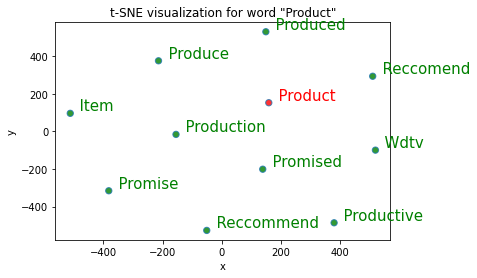

In [35]:
# tsne plot for top 10 similar word to 'product'
tsne_plot(for_word='product', w2v_model=fast_Text_model)

Working with Gensim fastText pre-trained model

In [42]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.bin.zip

--2022-08-02 07:24:42--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.bin.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4501919899 (4.2G) [application/zip]
Saving to: ‘wiki-news-300d-1M-subword.bin.zip’

wiki-news-300d-1M-s 100%[===================>]   4.19G  9.09MB/s    in 8m 26s  

2022-08-02 07:33:09 (8.49 MB/s) - ‘wiki-news-300d-1M-subword.bin.zip’ saved [4501919899/4501919899]



In [45]:
!unzip "/content/wiki-news-300d-1M-subword.bin.zip"

Archive:  /content/wiki-news-300d-1M-subword.bin.zip
  inflating: wiki-news-300d-1M-subword.bin  


In [46]:
import fasttext
model = fasttext.load_model("/content/wiki-news-300d-1M-subword.bin")

In [48]:
# tsne plot for top 10 similar word to 'food'
#tsne_plot(for_word='product', w2v_model=model)
model.get_nearest_neighbors("product",k=10)

[(0.7656861543655396, 'products'),
 (0.7636412978172302, 'product-line'),
 (0.759248673915863, 'one-product'),
 (0.7386252880096436, 'end-product'),
 (0.7352990508079529, 'workproduct'),
 (0.7343631386756897, 'product-'),
 (0.7333365678787231, 'product--'),
 (0.72476726770401, 'single-product'),
 (0.7188858389854431, 'work-product'),
 (0.7186290621757507, 'product-quality')]

We can compare ourt trained model and Pre trained model results

In [49]:
# Check top 10 similar word for a given word by gensim fastText
fast_Text_model.wv.most_similar('product', topn=10)

[('production', 0.4097890257835388),
 ('produce', 0.36762359738349915),
 ('productive', 0.3480420410633087),
 ('promise', 0.33817940950393677),
 ('produced', 0.33438074588775635),
 ('reccommend', 0.3263065218925476),
 ('promised', 0.3194241523742676),
 ('item', 0.2935600280761719),
 ('reccomend', 0.2876128554344177),
 ('wdtv', 0.28692740201950073)]